In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib agg

import visualization
from data import datasets, evaluation
import transformations
import jax
import jax.numpy as jnp
import flax.linen as nn
from flax.core import freeze
import optax
import inference
from utils import settings
import numpy as np
import os
import global_settings

rng_key = jax.random.PRNGKey(0)

dataset_names = [
    'airfoil',
    'boston',
    'concrete',
    'diabetes',
    'energy',
    'forest_fire',
    'wine',
    'yacht'
]

In [26]:
dataset = datasets.GenericBenchmark(dataset_name="yacht")

In [27]:
model_transformation = transformations.Sequential([
    nn.Dense(3),
    nn.tanh,
    nn.Dense(1)
])

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.34it/s]


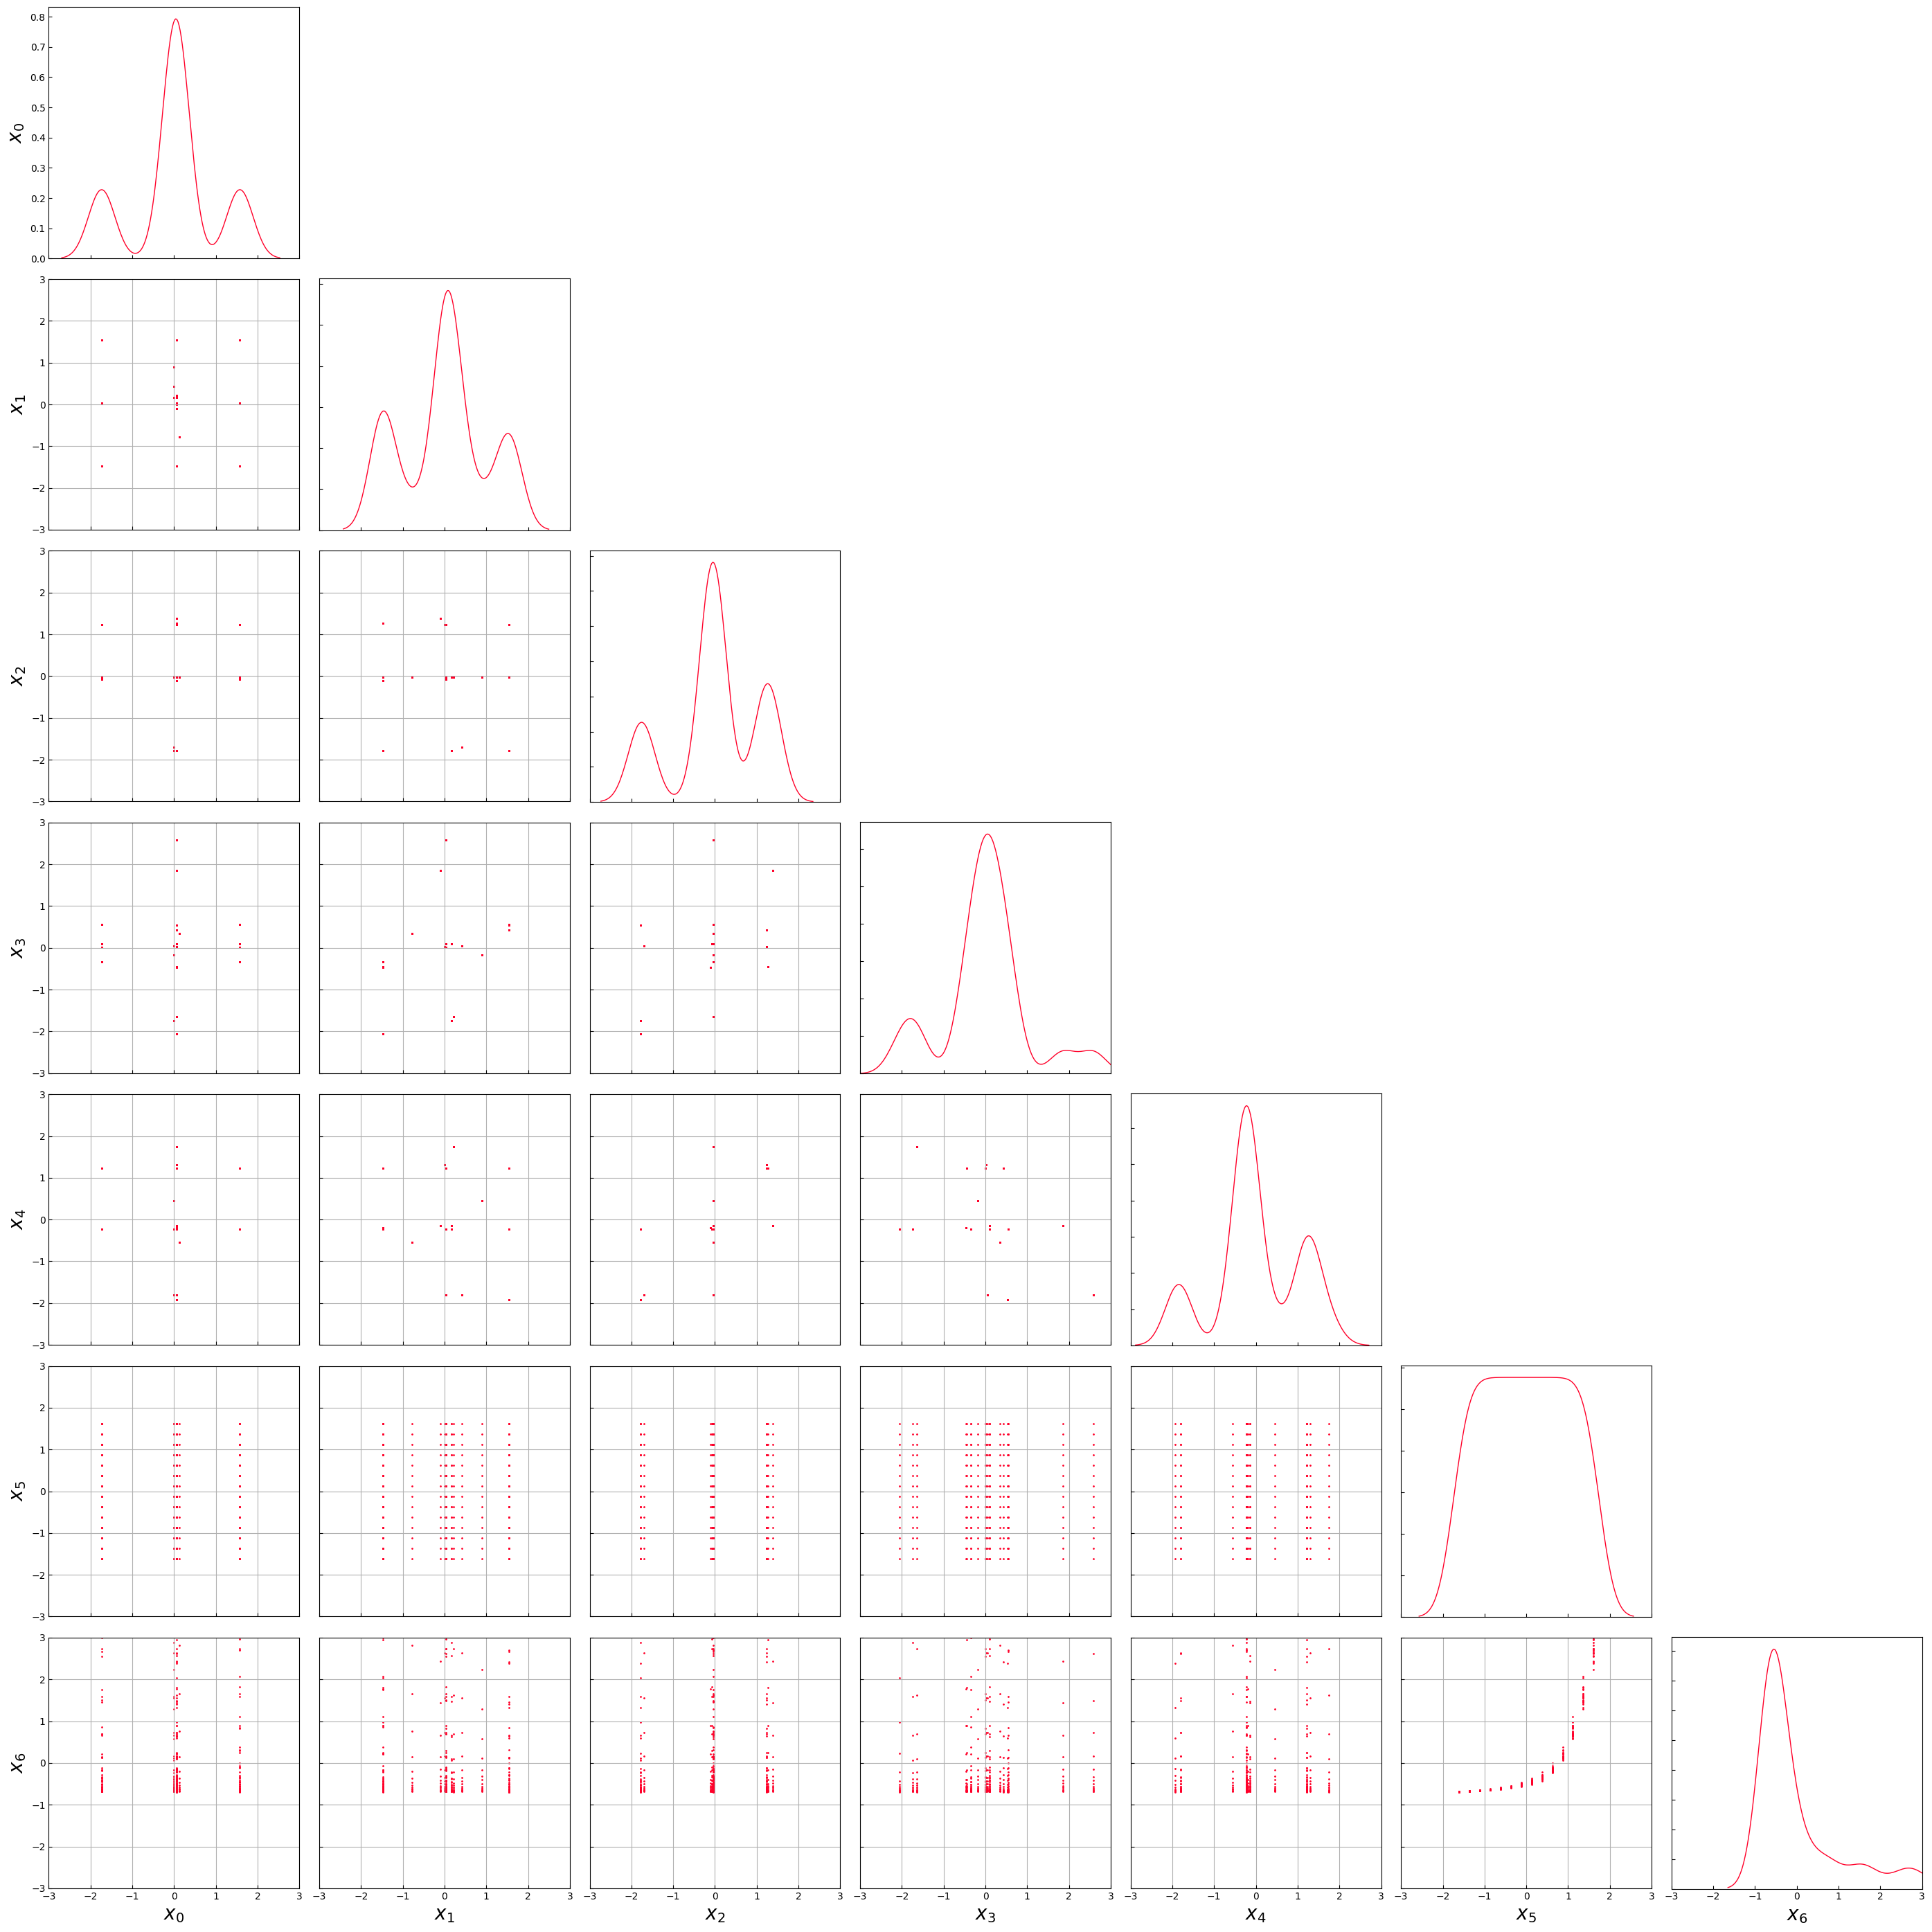

In [28]:
figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"x",
        settings_scatter=settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        ),
        label_size=20
    )
)
figure.plot(
    data_list=[dataset.data]
)

In [29]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, f"benchmark_{dataset.dataset_name}.pdf"), bbox_inches="tight", dpi=96)